In [1]:
# 姓名:陳泓睿
# 學號:105600824

In [2]:
# 作業:多元線性迴歸
# 根據每天的氣候因數, 決定城市準備共享單車的數量
# https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv

In [3]:
import pandas as pd

df = pd.read_csv("SeoulBikeData.csv", encoding="gbk", index_col=["Date"])
df

,Rented Bike Count,Hour,Temperature(癈),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(癈),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
data = df.copy()
data = data[data["Functioning Day"] == "Yes"]
data.pop("Functioning Day")  # 只能拿掉一次

Date
01/12/2017    Yes
01/12/2017    Yes
01/12/2017    Yes
01/12/2017    Yes
01/12/2017    Yes
             ... 
30/11/2018    Yes
30/11/2018    Yes
30/11/2018    Yes
30/11/2018    Yes
30/11/2018    Yes
Name: Functioning Day, Length: 8465, dtype: object

In [5]:
# 處理空值
# NaN 空值
data.info()
data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 01/12/2017 to 30/11/2018
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8465 non-null   int64  
 1   Hour                      8465 non-null   int64  
 2   Temperature(癈)            8465 non-null   float64
 3   Humidity(%)               8465 non-null   int64  
 4   Wind speed (m/s)          8465 non-null   float64
 5   Visibility (10m)          8465 non-null   int64  
 6   Dew point temperature(癈)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)   8465 non-null   float64
 8   Rainfall(mm)              8465 non-null   float64
 9   Snowfall (cm)             8465 non-null   float64
 10  Seasons                   8465 non-null   object 
 11  Holiday                   8465 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 1.1+ MB


In [6]:
# 處理欄位名稱(重新命名)
data = data.rename(
    columns={
        "Temperature(癈)": "Temperature(*C)",
        "Dew point temperature(癈)": "Dew point(*C)",
    }
)

In [7]:
# label encoder 將文字資料轉成對應的數字
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["Seasons"] = le.fit_transform(data["Seasons"])
data["Holiday"] = le.fit_transform(data["Holiday"])

In [8]:
target = data.pop("Rented Bike Count")

In [9]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data.values, target.values, test_size=0.2
)

In [10]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(data_train, target_train)
pre = regr.predict(data_test)
print(pre.round())
print(target_test)

[1372. 1177.  998. ...  417.  423.  995.]
[ 134 2103  901 ...  122 1040 1037]


In [11]:
# 1.決定係數
print(regr.score(data_train, target_train).round(3))
print(regr.score(data_test, target_test).round(3))
# >0.7

0.541
0.538


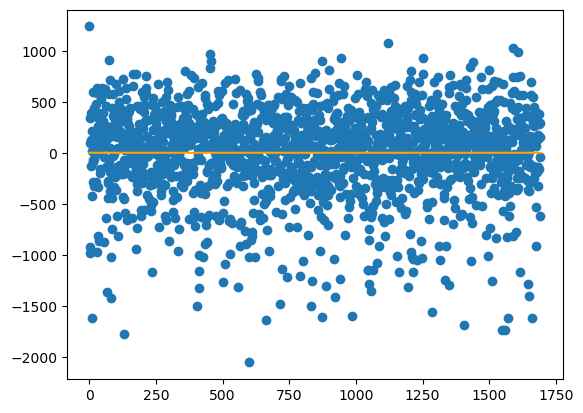

In [12]:
# 殘差圖
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(pre.size)
y = x * 0
plt.scatter(x, pre - target_test)
plt.plot(x, y, color="orange")
plt.show()